# ANALIZA FPL

Želim analizirati igralce v angleški Premier ligi sezoni 2020/21 in njihov vpliv v Fantasy premier ligi.

In [64]:
#IMPORT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


#PODATKI

pot_players = os.path.join(os.pardir, 'FPL-vaastav', 'data', '2020-21', 'cleaned_players.csv') #ne razumem zkj path ni ok -> morm dodt os.pardir
df_players = pd.read_csv(pot_players)



## Urejanje podatkov
V spodnji tabeli so vsi zbrani podatki o igralcih Premier League za sezono 2020/21.

In [65]:
df_players

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Mesut,Özil,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.5,67,MID
1,Sokratis,Papastathopoulos,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,48,DEF
2,David,Luiz Moreira Marinho,0,0,25,886,12,30.7,132.8,88.0,0,138,24.9,3,1,1,0.7,54,DEF
3,Pierre-Emerick,Aubameyang,5,1,73,1574,16,227.2,275.2,549.0,6,208,105.0,7,0,2,6.5,113,MID
4,Cédric,Soares,0,1,23,429,4,86.3,66.6,24.0,3,88,17.7,2,0,1,0.3,46,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Andreas,Söndergaard,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.3,40,GK
663,Patrick,Cutrone,0,0,2,23,0,0.0,0.0,4.0,0,5,0.2,0,0,0,0.0,59,FWD
664,Nigel,Lonwijk,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,40,DEF
665,Willian José,Da Silva,0,1,10,258,2,22.6,21.2,81.0,0,30,12.4,1,0,0,0.2,70,FWD


Prvo izločimo vse neaktivne in premalo aktivne igralce. Tiste, ki so v letošnji sezon igrali manj kot 700 minut in dosegli manj kot 40 točk. In dodamo še dodatni polji eff_time, ki pove število doseženih točk na 100 min in eff_price število doseženih točk na milijon. <br>

### Spodnja tabela prikazuje 30 igralcev, z največ doseženimi točkami.

In [66]:
df_players.loc[:, 'eff_time'] = (df_players.total_points / df_players.minutes) * 100
df_players.loc[:, 'eff_price'] = (df_players.total_points / df_players.now_cost) * 10
df_aktivni = df_players.loc[(df_players.minutes > 700) & (df_players.total_points > 40)]
df_aktivni.sort_values('total_points', ascending = False).head(30)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,eff_time,eff_price
404,Bruno Miguel,Borges Fernandes,13,11,169,1925,25,994.7,907.4,817.0,...,605,272.1,8,0,4,59.2,115,MID,8.779221,14.695652
536,Heung-Min,Son,13,6,155,1886,16,569.4,710.0,698.0,...,493,198.1,9,0,0,54.9,96,MID,8.218452,16.145833
339,Mohamed,Salah,16,4,155,1831,28,507.7,731.6,1070.0,...,470,230.9,5,0,0,43.9,127,MID,8.465319,12.204724
534,Harry,Kane,13,11,151,1744,17,397.7,803.6,856.0,...,540,205.5,7,0,1,19.8,110,FWD,8.658257,13.727273
302,Patrick,Bamford,12,8,130,1875,36,194.5,569.4,1039.0,...,432,180.1,7,0,1,50.1,67,FWD,6.933333,19.402985
43,Jack,Grealish,6,12,127,1887,24,949.3,665.4,863.0,...,490,247.6,11,0,5,40.4,78,MID,6.730260,16.282051
211,Dominic,Calvert-Lewin,13,5,120,1763,26,186.4,561.2,970.0,...,412,171.5,5,0,3,43.2,77,FWD,6.806580,15.584416
270,Jamie,Vardy,11,8,117,1505,19,185.6,528.8,770.0,...,412,148.5,6,0,1,14.3,100,FWD,7.774086,11.700000
457,Callum,Wilson,10,6,116,1812,31,217.1,479.2,653.0,...,356,134.7,5,0,2,20.6,67,FWD,6.401766,17.313433
33,Emiliano,Martínez,0,0,116,1890,24,20.0,576.0,0.0,...,497,59.4,11,0,0,35.0,52,GK,6.137566,22.307692


# Analiza po pozicijah
Zanima nas v katero vrsto igralcev se nam najbolj splača vložiti sredstva. Gledamo povprečne vrednosti igralcev, ki igrajo na isti poziciji:
* DEF - obrambni igralci 
* FWD - napadalni igralci
* GK - golmani
* MID - vezni igralci

Med aktivnimi igralci je število igralcev glede na pozicijo razporejeno neenakomerno (daleč največ je branilcev), zato vzemimo le 10 najboljših igralcev na pozicijo. Izpustimo stolpce, ki so očitno odvisni od pozicije (največ golov bodo prispevali napadalci,...) ali pa nas ne zanimajo (goals, assists, goals_conceded, selected, minutes, selected_by_percent, yellow_cards, red_cards)

In [67]:
branilci = df_aktivni[df_aktivni.element_type == 'DEF'].sort_values('total_points', ascending = False).head(10)
napadalci = df_aktivni[df_aktivni.element_type == 'FWD'].sort_values('total_points', ascending = False).head(10)
veza = df_aktivni[df_aktivni.element_type == 'MID'].sort_values('total_points', ascending = False).head(10)
golmani = df_aktivni[df_aktivni.element_type == 'GK'].sort_values('total_points', ascending = False).head(10)
top_des = pd.concat([branilci,napadalci,golmani,veza])
povprecje = top_des.groupby('element_type').mean()[['total_points', 'minutes', 'bonus', 'bps', 'ict_index', 'now_cost', 'eff_time', 'eff_price']]

In [68]:
povprecje

,total_points,minutes,bonus,bps,ict_index,now_cost,eff_time,eff_price
element_type,,,,,,,,
DEF,94.5,1780.5,9.6,424.2,90.12,56.6,5.439908,16.928591
FWD,107.2,1711.0,14.4,367.8,158.93,81.2,6.274940,13.605278
GK,92.3,1915.1,8.3,420.3,48.62,52.4,4.823837,17.654402
MID,124.8,1773.3,13.9,404.8,189.61,93.2,7.064051,14.088900


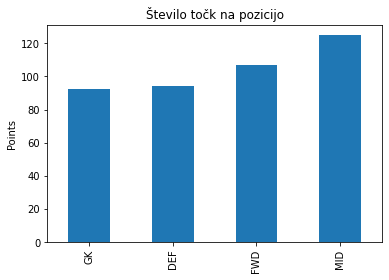

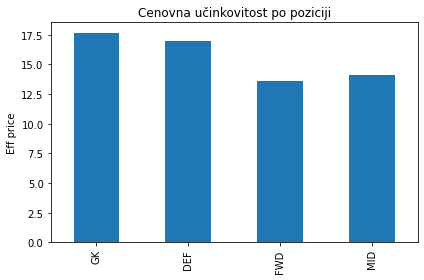

In [73]:
povprecje.sort_values('total_points').plot.bar(y = 'total_points', legend = None)
plt.xlabel(None)
plt.ylabel('Points')
plt.title('Število točk na pozicijo')

povprecje.sort_values('total_points').plot.bar(y = 'eff_price', legend = None)
plt.xlabel(None)
plt.ylabel('Eff price')
plt.title('Cenovna učinkovitost po poziciji')
plt.tight_layout()

* Iz prvega stolpičastega diagrama je razvidno, da največ točk prinesejo na pozicijo napadalci in vezisti.
* Zaradi precej nižje cene obrambnih igralcev in vratarjev pa je vrstni red pri Eff price (število doseženih točk na milijon) ravno obrnjen. Vratarji in branilci vračajo na vložena sredstva precej več točk.
* V zgornji tabeli pri stolpcih bonus (število doseženih bonus točk) in bps (index na podlagi katerega se dodeljuje bonus točke) vidimo, da prevladujejo napadalci in vezni igralci.
* Pri kategoriji eff_time (število točk na časovno enoto) opazimo, da dani čas najbolje izkoristijo vezisti in napadalci.

 ### S čim sovpada vrednost total_points
 Bistvo FPL je nabiranje točk. Zato me zanima kakšna je korelacija med točkami in vrednostjo igralcev ter točkami in ICT indexom.
 1. Korelacija točk in vrednosti igralcev

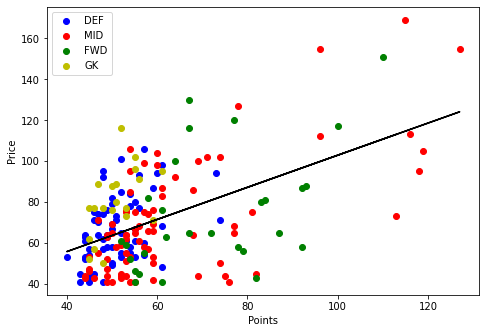

In [70]:
fig= plt.figure()
ax = fig.add_axes([0,0,1,1])

df_akt_def = df_aktivni.loc[(df_aktivni.element_type == 'DEF')]
ax.scatter(df_akt_def['now_cost'],df_akt_def['total_points'], color = 'b', label = 'DEF')
df_akt_mid = df_aktivni.loc[(df_aktivni.element_type == 'MID')]
ax.scatter(df_akt_mid['now_cost'],df_akt_mid['total_points'], color = 'r',label = 'MID')
df_akt_fwd = df_aktivni.loc[(df_aktivni.element_type == 'FWD')]
ax.scatter(df_akt_fwd['now_cost'],df_akt_fwd['total_points'], color = 'g',label = 'FWD')
df_akt_gk = df_aktivni.loc[(df_aktivni.element_type == 'GK')]
ax.scatter(df_akt_gk['now_cost'],df_akt_gk['total_points'],color = 'y', label = 'GK')

#povprečna vrednost 
x = df_aktivni['now_cost']
y = df_aktivni['total_points'] 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k-")

ax.set_xlabel('Points')
ax.set_ylabel('Price')
#ax.set_title(??)
ax.legend()

plt.show()


Iz zgornjega prikaza je razvidno, da je korelacija med ceno igralcev in številom doseženih točk, vendar daokaj šibka, kar ni presenetljivo, saj FPL redno posodoblja cene igralcev glede na njihovo pordukcijo. Predvsem izstopa dejstvo, da ni nobenega poceni igralca, ki dosega veliko točk (ne vidimo nobene točke v zgornjem levem delu mreže). Administratorji FPL zelo dobro napovedujejo pričakovano število točk in glede na to ceno igralca v sezoni.  

2. Korelacija točk in ICT-indexa
ICT (influence creativity threat) index je indeks supne produktivnosti igralca na vseh odigranih tekmah. Kombinacija statistično pomembnih podatkov, ki jih beleži FPL, in naj bi FPL managerjem pomagale napovedovati učinkovitost igralca.

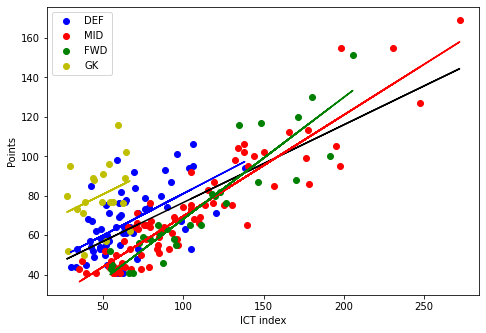

In [71]:
fig= plt.figure()
ax = fig.add_axes([0,0,1,1])

df_akt_def = df_aktivni.loc[(df_aktivni.element_type == 'DEF')]
ax.scatter(df_akt_def['ict_index'],df_akt_def['total_points'], color = 'b', label = 'DEF')
df_akt_mid = df_aktivni.loc[(df_aktivni.element_type == 'MID')]
ax.scatter(df_akt_mid['ict_index'],df_akt_mid['total_points'], color = 'r',label = 'MID')
df_akt_fwd = df_aktivni.loc[(df_aktivni.element_type == 'FWD')]
ax.scatter(df_akt_fwd['ict_index'],df_akt_fwd['total_points'], color = 'g',label = 'FWD')
df_akt_gk = df_aktivni.loc[(df_aktivni.element_type == 'GK')]
ax.scatter(df_akt_gk['ict_index'],df_akt_gk['total_points'],color = 'y', label = 'GK')

#povprečna vrednost 
sez = [(df_aktivni, "k-"), ([df_akt_def, 'b-']), (df_akt_gk, '-y'), (df_akt_mid, '-r'), (df_akt_fwd, '-g')]
for (df_ , color) in sez:
    x = df_['ict_index']
    y = df_['total_points'] 
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),color)


ax.set_xlabel('ICT index')
ax.set_ylabel('Points')
#ax.set_title(??)
ax.legend()

plt.show()

Korelacija med ICT indexom in točkami je veliko bolj očitna. ICT index zelo močno korelira z produkcijo točk branilcev, vezistov in napadalcev, nekoliko slabše pa vraterjev. 

# Zaključek
Iz dane analize podatkov igralcev PL sezone 2020/21 smo izluščili par pomembnejših dejstev:
1. Pozicije katere vračajo največ točk na vložena sredstva so vratarji in branilci. Kljub manjšemu številu vseh točk pa zaradi relativno nizke cene ostajajo obrambni igralci boljša naložba.
2. FPL administratorji opravljajo odlično delo z napovedovanjem cen igralcev, saj obstaja dobra korelacija med ceno in vrednostjo igralca.
3. Še močnejša korelacija pa je razvidna med produkcijo igralcev in ICT indexom. ICT index se nam splača upoštevati pri izbiri vseh igralcev razen vratarjev.